# P2 Analyse exploratoire

sous table des matières : reprendre les données  
(shape, display, describe)  

https://world.openfoodfacts.org/data/data-fields.txt

## Sommaire

- [Introduction](#intro)
  - [Problématique](#problematique)  
  - [Imports Python](#imports)  
  - [Chargement des données](#charg_donnees)  
  - [Survol des données](#charg_donnees)  

## Introduction <a name="intro"></a>

### Problématique <a name="problematique"></a>

****************
****************
TODO : rappel pbic ici
****************
****************

### Imports Python <a name="imports"></a>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données <a name="charg_donnees"></a>

In [110]:
DATASETS_PATH = "/Users/julmat/DataSets/"
dataset_name="oc_p2_openfoodfacts_products.csv"

data_raw = pd.read_csv(DATASETS_PATH+dataset_name, sep="\t")

display(data_raw)

/var/folders/ks/c88gvk111fgfy224r4gqv7mc0000gn/T/ipykernel_49791/165151116.py:4: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(DATASETS_PATH+dataset_name, sep="\t")


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Survol des données

#### Types de données

In [ ]:
data_raw.dtypes.value_counts(normalize=True).plot.pie(
    autopct="%1.1f%%", legend=True
    )

#### Structure des données

In [202]:
with pd.option_context('display.max_rows', 500):
    display(data_raw.describe().T.sort_index())

,count,mean,std,min,25%,50%,75%,max
additives_n,248939.0,1.936024,2.502019e+00,0.000000,0.000000e+00,1.000000,3.000000,3.100000e+01
alcohol_100g,4133.0,7.838105,1.095967e+01,0.000000,0.000000e+00,5.000000,12.000000,9.790000e+01
alpha-linolenic-acid_100g,186.0,2.250285,7.971418e+00,0.000000,6.875000e-02,0.117500,0.604000,7.500000e+01
arachidic-acid_100g,24.0,10.752667,4.019993e+00,0.064000,7.275000e+00,12.850000,13.375000,1.540000e+01
arachidonic-acid_100g,8.0,0.057000,2.553429e-02,0.007000,4.625000e-02,0.061000,0.068500,9.000000e-02
behenic-acid_100g,23.0,10.673913,3.379647e+00,5.200000,7.100000e+00,12.600000,13.050000,1.460000e+01
beta-carotene_100g,34.0,0.518715,2.561144e+00,0.000000,1.225000e-03,0.005261,0.140000,1.500000e+01
bicarbonate_100g,81.0,0.119052,1.894861e-01,0.000006,1.732000e-02,0.036000,0.143000,1.250000e+00
biotin_100g,330.0,0.121290,7.379124e-01,-2.000000,5.725000e-06,0.000014,0.000041,6.000000e+00
butyric-acid_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Valeurs manquantes

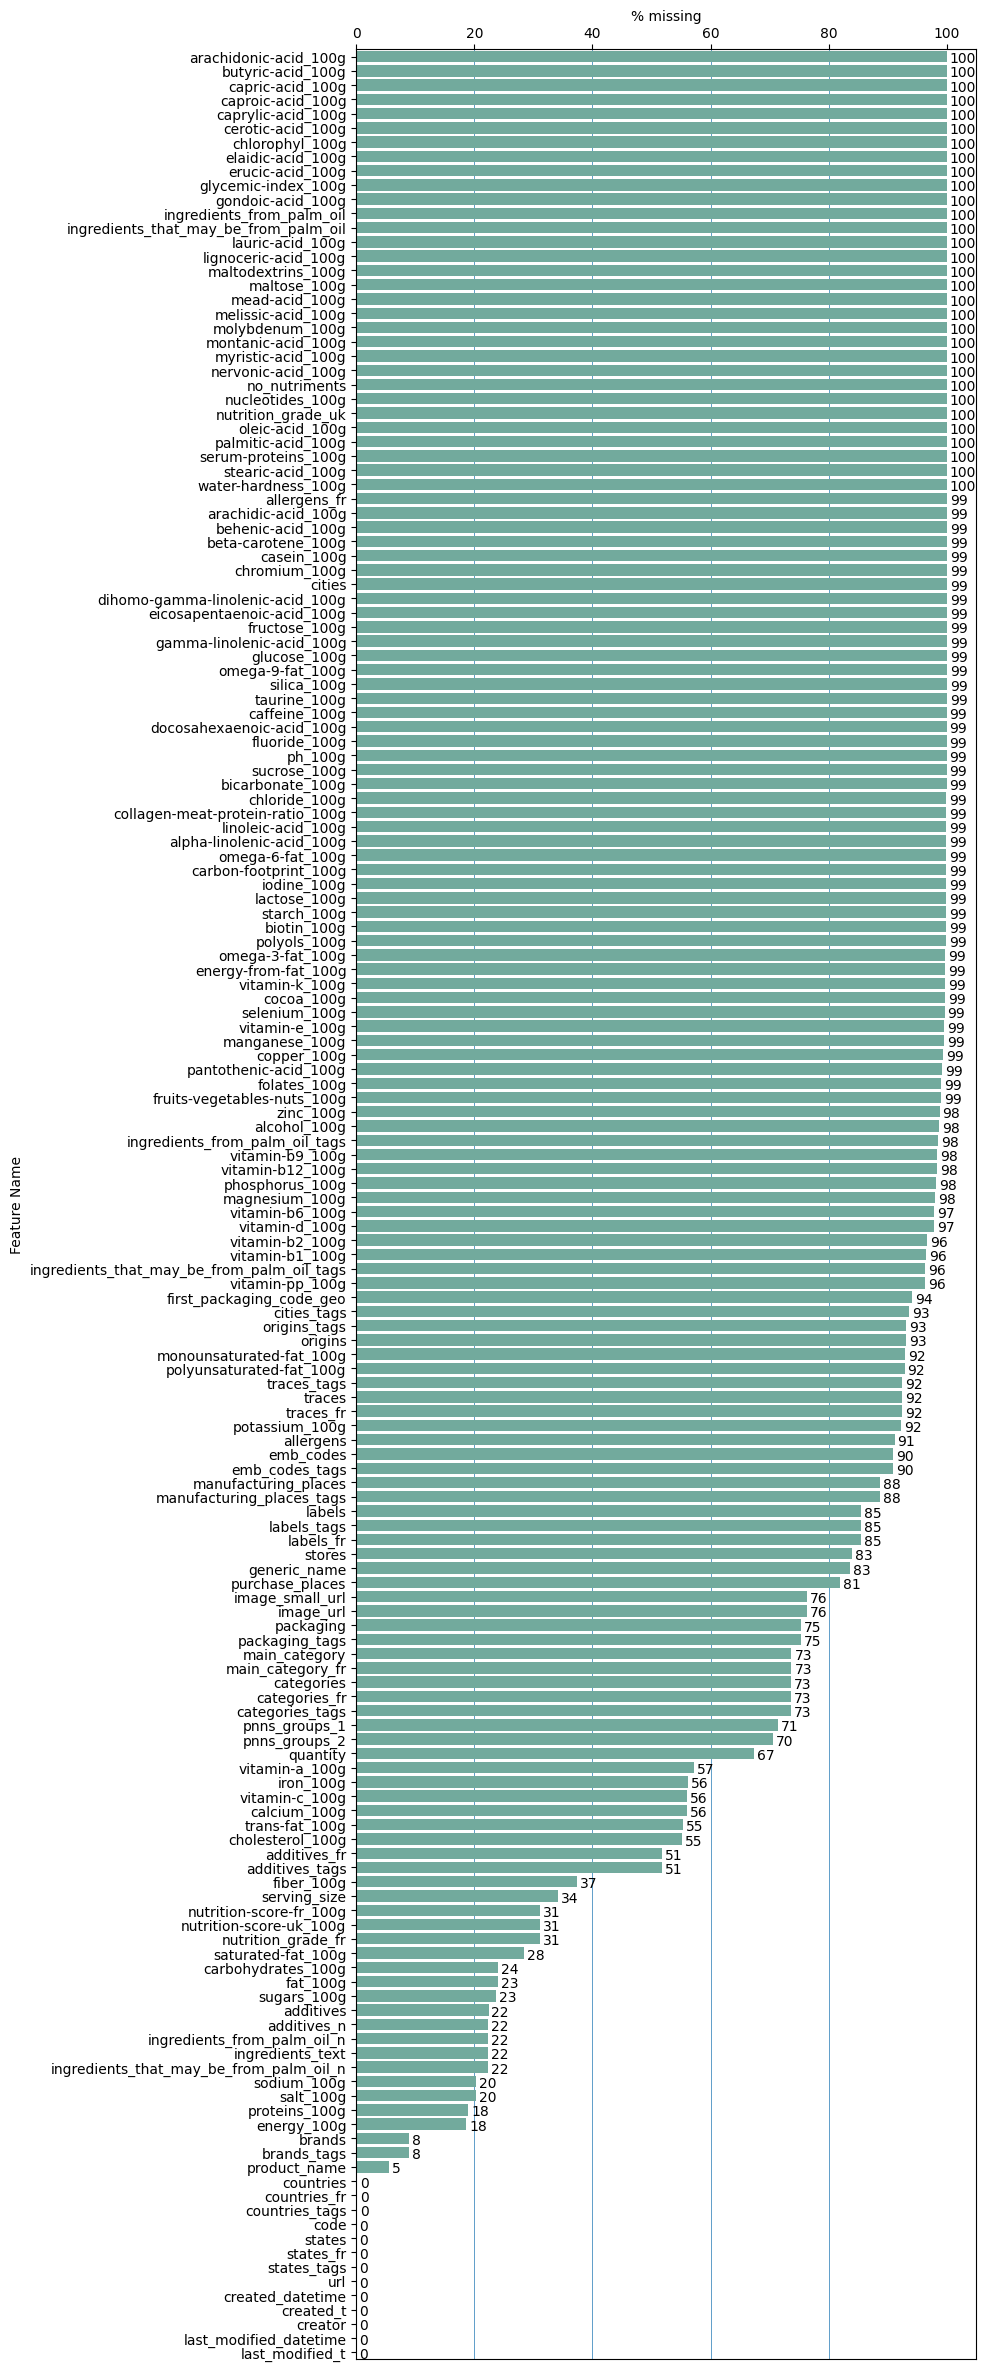

In [203]:
# valeurs nulles en pourcentage et triées
def percent_missing(df):
    ds_isnull_prct = (df.isnull().sum() * 100 / len(df)
                      ).round(2)
    
    # set to DF for futrure display
    df_isnull_prct = pd.DataFrame({
        "Feature Name": data_raw.columns,
        "% missing": ds_isnull_prct,
        }).sort_values(by=["% missing", "Feature Name"],
                       ascending=[False, True]
                       ).reset_index(drop=True)
    
    return df_isnull_prct

# afficher la valeur sur l'axe
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

data_nulls = percent_missing(data_raw)

plt.figure(figsize=(8, 30))

sns_t = sns.barplot(
    x="% missing", 
    y="Feature Name", 
    data=data_nulls, 
    color='#69b3a2'
)

sns_t.xaxis.set_ticks_position("top")
sns_t.xaxis.set_label_position('top')
sns_t.axvline(x=20, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=40, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=60, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=80, ymin=0, linewidth=0.5, zorder=0)

show_values_on_bars(sns_t, "h", 0.5)

## Si > 50% nuls : se poser la question (si > 80-90%, virer ?)

Objectifs :
- méthode applicable à ce cas métier pour remplir les nuls (nombreux) :
  - tester + montrer prq pas top : moyenne
  - idem médiane
  - trouver méthode applicable avec métier

<AxesSubplot: >

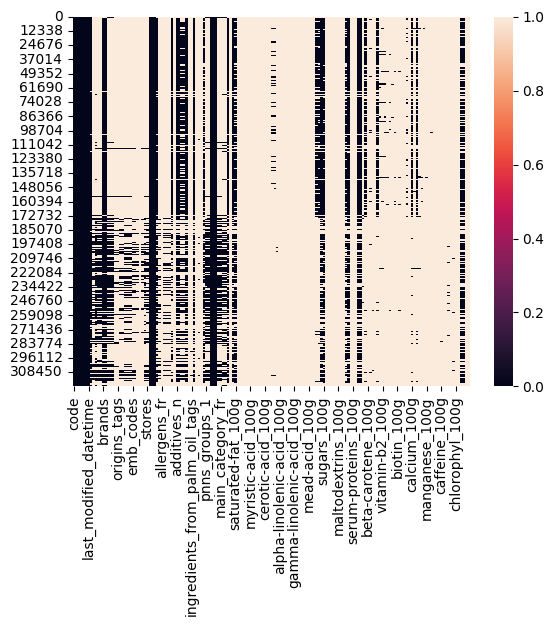

In [108]:
sns.heatmap(data_raw.isnull())